In [437]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize'] = (12, 8)

In [438]:
path_train = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/Freezing_Fritz_2023/data_train_Temperature.csv'
path_test = '/Users/abdelbastnassiri/Desktop/master studies/ML Challenges/Freezing_Fritz_2023/data_test_Temperature.csv'
train_data = pd.read_csv(path_train)
test_data = pd.read_csv(path_test)

In [439]:
train_data.head()

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,5.0,0.0,0.0,1.0,12.916896,23.089235
1,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,1.0,0.0,0.0,17.502831,23.475062
2,1.0,0.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,0.0,0.0,17.075724,20.054603
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,5.395592,17.970927
4,1.0,0.0,0.0,1.0,0.0,2.0,5.0,2.0,0.0,1.0,1.0,9.117357,14.930654


In [440]:

train_data.describe()

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.498082,0.503014,0.488219,0.498630,2.435068,2.510137,2.490411,2.471233,0.503014,0.481644,0.496438,8.365149,19.543798
std,0.500133,0.500128,0.499998,0.500135,1.745382,1.721584,1.695272,1.709548,0.500128,0.499800,0.500124,7.758904,11.238619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.996860,3.521210
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.654068,14.149120
50%,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0.000000,8.492403,17.932720
75%,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,15.141033,21.061605
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,21.972642,79.088778


We are going to drop the temperatures in bed that outside the range of the temperature Outside. 

In [441]:
max = train_data['Temperature Outside'].max()
min = train_data['Temperature Outside'].min()
train_data.drop(index = train_data[(train_data['Temperature Bed'] > max) | (train_data['Temperature Bed'] < min)].index,
                inplace = True)

In [237]:
train_data.describe()

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,0.495264,0.514208,0.494587,0.500677,2.331529,2.473613,2.460758,2.434371,0.536536,0.504736,0.491881,6.657885,16.095685
std,0.500147,0.499967,0.500140,0.500169,1.764302,1.717423,1.684134,1.708066,0.498832,0.500147,0.500103,7.067043,3.805981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.996860,3.521210
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.654831,13.201974
50%,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.500000,2.000000,1.000000,1.000000,0.000000,6.540819,16.589747
75%,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,12.605886,19.347449
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,21.354192,21.967651


In [442]:
train_data.shape

(1478, 13)

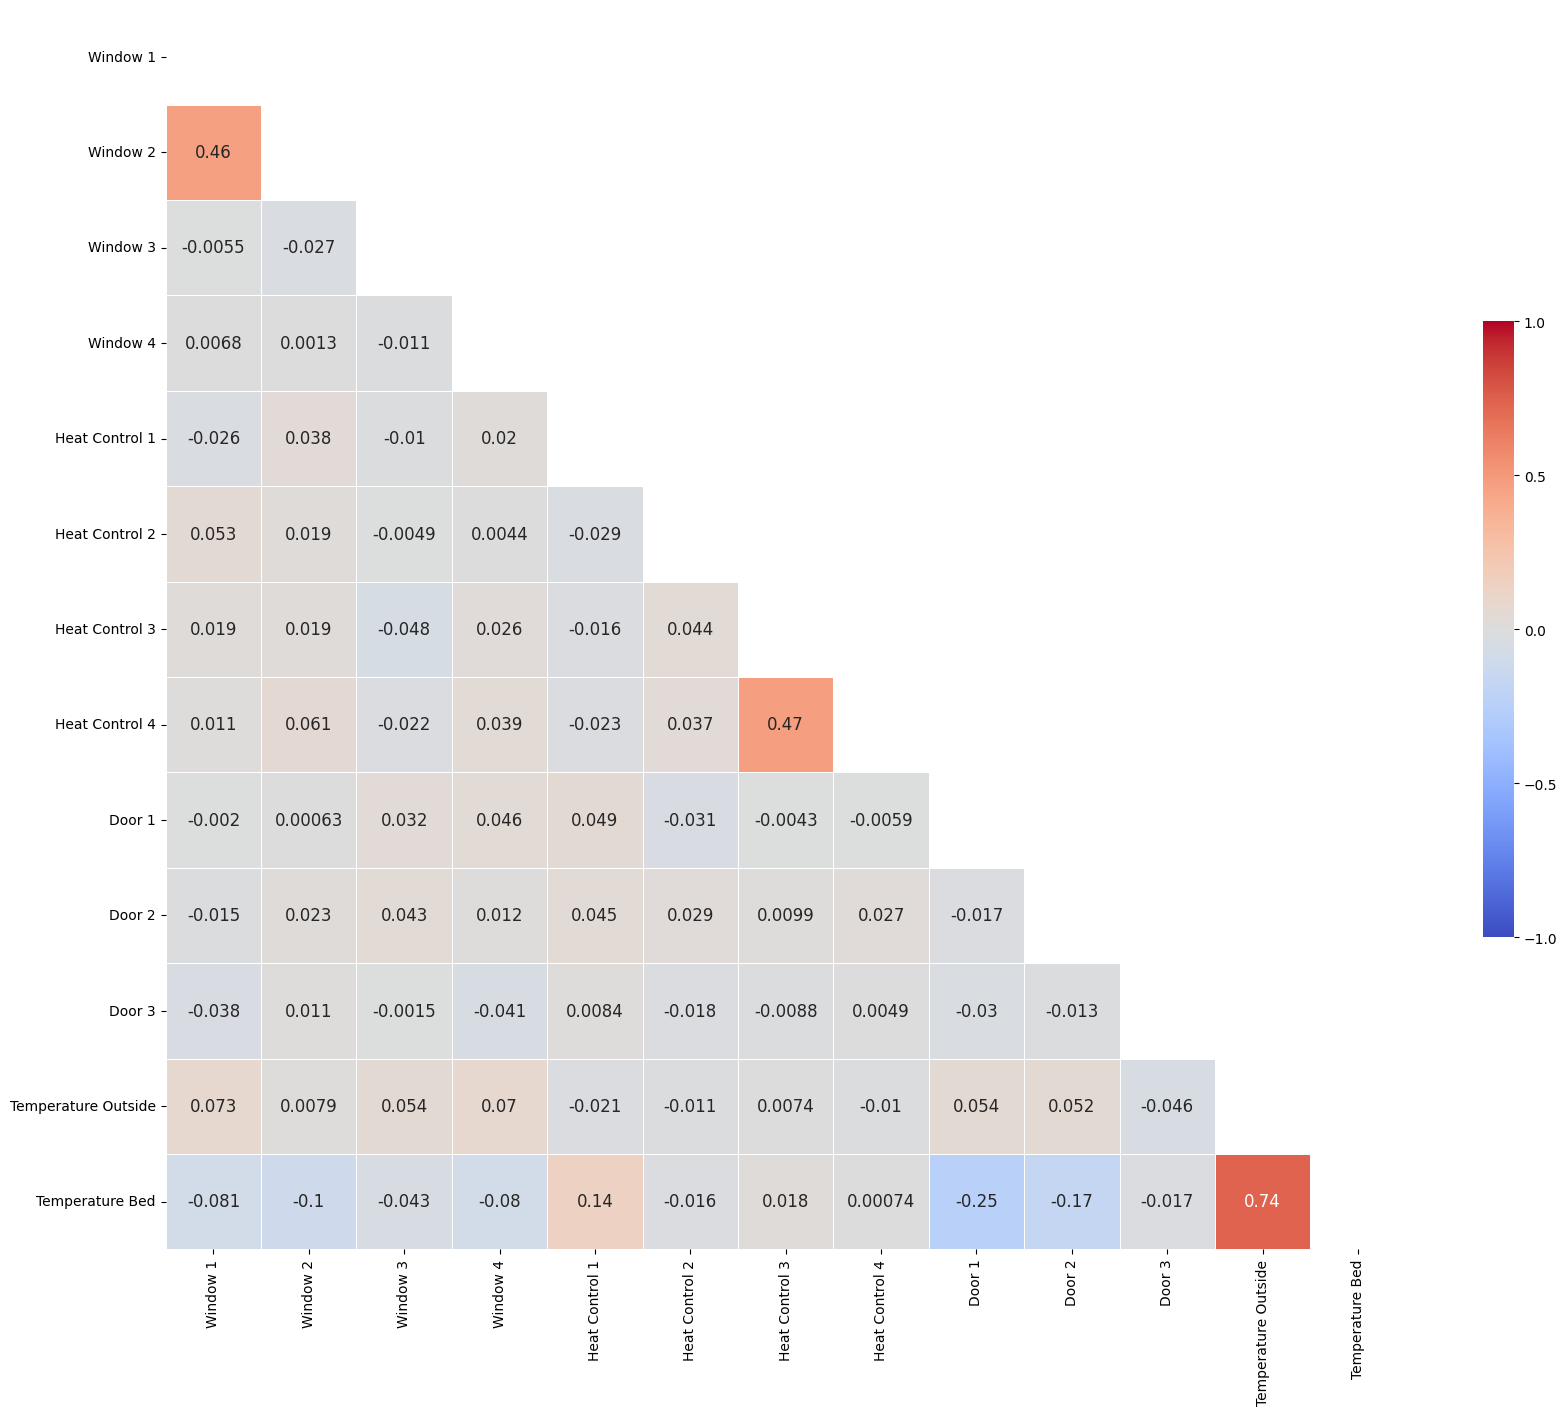

In [443]:
Corr = train_data.corr(method = 'pearson')
mask = np.zeros_like(Corr, dtype = bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(20,20)) 
heatmap = sns.heatmap(Corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,       
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
ax.set_yticklabels(Corr.columns, rotation = 0)
ax.set_xticklabels(Corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

The heatmap suggests correlation with 6 features.

In [444]:
features = [col for col in Corr.columns if np.abs(Corr[col].iloc[12]) > 0.08]
features.remove('Temperature Bed')
features.remove('Temperature Outside')

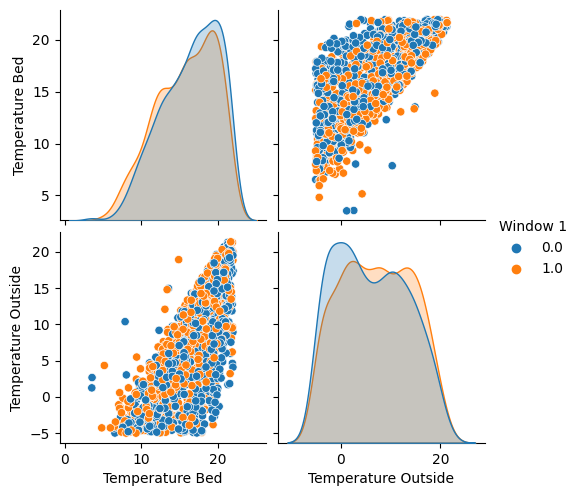

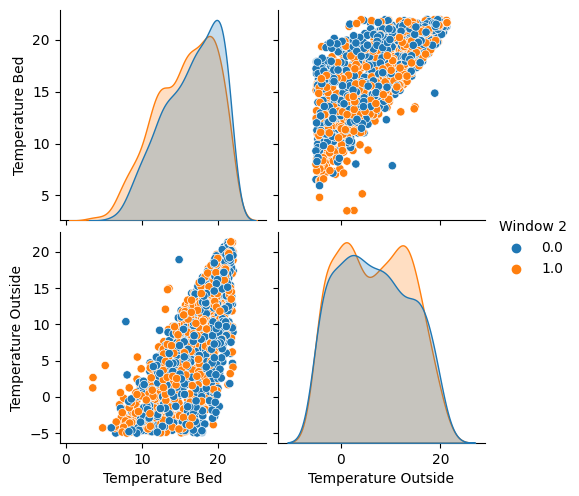

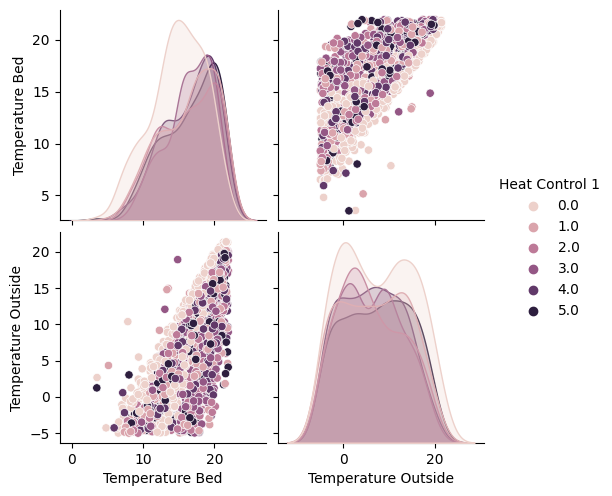

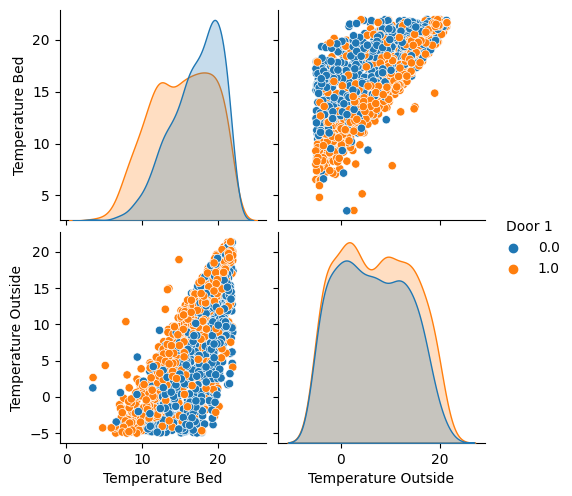

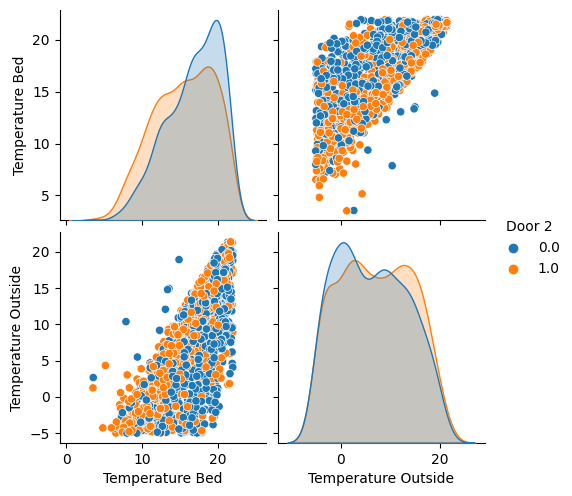

In [445]:
for i in features:
    sns.pairplot(data = train_data, vars = ['Temperature Bed', 'Temperature Outside'], kind = 'scatter', hue = i)
    plt.show()

In [446]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


In [447]:
X = train_data.copy()
X.drop(columns = ['Temperature Bed'], inplace = True)
y = train_data['Temperature Bed']


In [448]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
import lightgbm as lgbm

r_s = 123

In [449]:
models = [
          ('DecisionTreeRegressor', DecisionTreeRegressor()), 
          ('RandomForestRegressor', RandomForestRegressor(random_state = r_s)), 
          ('GradientBoostingRegressor', GradientBoostingRegressor()),
          ('xgb', XGBRegressor()), 
          ('RidgeRegression', Ridge(alpha = 1.0)), 
          ('LinearRegression', LinearRegression()), 
          ('Lasso', Lasso()),
          ('ElasticNet', ElasticNet()),
          ('SVR', SVR()), 
          ('Polynomial Ridge', KernelRidge(kernel = 'poly')),
          ('CatBoostRegressor', CatBoostRegressor(verbose = False, iterations = 1000)),
          ('LightGBM', lgbm.LGBMRegressor()),
          ('AdaBoostRegressor', AdaBoostRegressor())
          ]


In [450]:
cv = KFold(n_splits = 10, random_state = r_s, shuffle = True)

In [451]:
score_table = pd.DataFrame(columns = ['mean_absolute_error', 'mean_squared_error', 'r2_score'], 
                           index = [model[0] for model in models])

for model in models:
    score = cross_validate(model[1], X, y, cv = cv, scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
    score_table.loc[model[0]]['mean_absolute_error'] = - score['test_neg_mean_absolute_error'].mean()
    score_table.loc[model[0]]['mean_squared_error'] = - score['test_neg_mean_squared_error'].mean()
    score_table.loc[model[0]]['r2_score'] =  score['test_r2'].mean()
    

In [452]:
score_table

,mean_absolute_error,mean_squared_error,r2_score
DecisionTreeRegressor,1.24973,4.224891,0.70627
RandomForestRegressor,0.904966,2.029834,0.8587
GradientBoostingRegressor,0.955169,2.214839,0.845588
xgb,0.893118,2.067553,0.856044
RidgeRegression,1.439866,3.808682,0.734348
LinearRegression,1.439944,3.808752,0.734341
Lasso,1.991223,6.676278,0.535516
ElasticNet,1.956904,6.384187,0.555793
SVR,1.385536,3.947576,0.724637
Polynomial Ridge,0.992726,2.188141,0.847301


We are going to choose CatBoostRegressor as our model since it is the model with smallest MSE.

Fist some hyperparameter tunning.

## Hyperparameter Tunning.

In [453]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate': [0.001, 0.01, 0.03, 0.1],
          'depth': [4, 6, 10],
          'l2_leaf_reg': [1, 3, 5]}


In [454]:
FinalModel = GridSearchCV(CatBoostRegressor(iterations = 1000, verbose = False), param_grid = params, cv = cv, scoring = 'neg_mean_squared_error')

In [455]:
FinalModel.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x29d831790>,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.001, 0.01, 0.03, 0.1]},
             scoring='neg_mean_squared_error')

## Prediction.

In [463]:
X_test = test_data.drop(columns = ['Temperature Bed'])

# predict
predictedLabels = FinalModel.predict(X_test)
np.savetxt("TheFisherMan.csv", predictedLabels, delimiter=",")


Thank you.